In [30]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import re

In [31]:
%matplotlib inline

In [37]:
import os
os.getcwd()
os.chdir('Python3Code')

In [157]:
df = pd.read_csv('df_final.csv')

In [8]:
df.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'activity', 'heart_bpm_interpolate', 'pca_1', 'pca_2', 'pca_3', 'pca_4',
       'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11',
       'pca_12'],
      dtype='object')

In [13]:
print(df['index'])

0       2025-06-10 14:45:56.519009300
1       2025-06-10 14:45:57.519009300
2       2025-06-10 14:45:58.519009300
3       2025-06-10 14:45:59.519009300
4       2025-06-10 14:46:00.519009300
                    ...              
7506    2025-06-06 17:59:56.812088800
7507    2025-06-06 17:59:57.812088800
7508    2025-06-06 17:59:58.812088800
7509    2025-06-06 17:59:59.812088800
7510    2025-06-06 18:00:00.812088800
Name: index, Length: 7511, dtype: object


Fourier Transform

In [ ]:
# Define your feature columns
cols_to_use = [col for col in df.columns if any(sensor in col for sensor in ['acc_'])]

# Set parameters
sampling_rate = 1  # Hz
window_size = 60   # samples

# Apply FFT transformation
ft = FourierTransformation()
df_with_fft = ft.abstract_frequency(df.copy(), cols=cols_to_use, window_size=window_size, sampling_rate=sampling_rate)

In [59]:
df_with_fft.tail()

,index,acc_z,acc_y,acc_x,gyro_z,gyro_y,gyro_x,grav_z,grav_y,grav_x,...,pca_12,acc_z_max_freq,acc_z_freq_weighted,acc_z_pse,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_x_max_freq,acc_x_freq_weighted,acc_x_pse
7506,2025-06-06 17:59:56.812088800,-0.142828,-0.024530,-0.112368,0.018568,-0.035327,-0.052718,-7.883890,-5.819637,0.343042,...,-0.462761,0.476667,-0.050865,3.167939,0.176667,0.026212,4.678454,0.500000,0.114255,4.188128
7507,2025-06-06 17:59:57.812088800,-0.078357,-0.117142,0.038065,0.023707,-0.004818,-0.033647,-7.950965,-5.734138,0.225927,...,-0.569950,0.443333,-0.056670,3.235109,0.056667,0.389172,4.673977,0.476667,-0.003098,4.255870
7508,2025-06-06 17:59:58.812088800,-0.094664,-0.112366,-0.001020,0.005522,-0.013835,-0.008230,-8.159792,-5.438808,-0.020489,...,-0.630220,0.476667,-0.066597,3.069348,0.050000,-1.291859,4.655776,0.186667,-0.383647,4.274772
7509,2025-06-06 17:59:59.812088800,-0.126935,-0.073591,-0.006388,-0.040196,-0.003468,0.078805,-7.941927,-5.743007,-0.007377,...,-0.796951,0.213333,-0.104559,2.863511,0.400000,1.138111,4.665707,0.476667,0.142109,4.249940
7510,2025-06-06 18:00:00.812088800,-0.127876,-0.087726,0.011362,-0.005015,-0.008947,0.016040,-7.668263,-6.111668,0.111295,...,-0.672825,0.476667,-0.099073,2.940879,0.046667,0.196327,4.673953,0.500000,-0.072726,4.243913


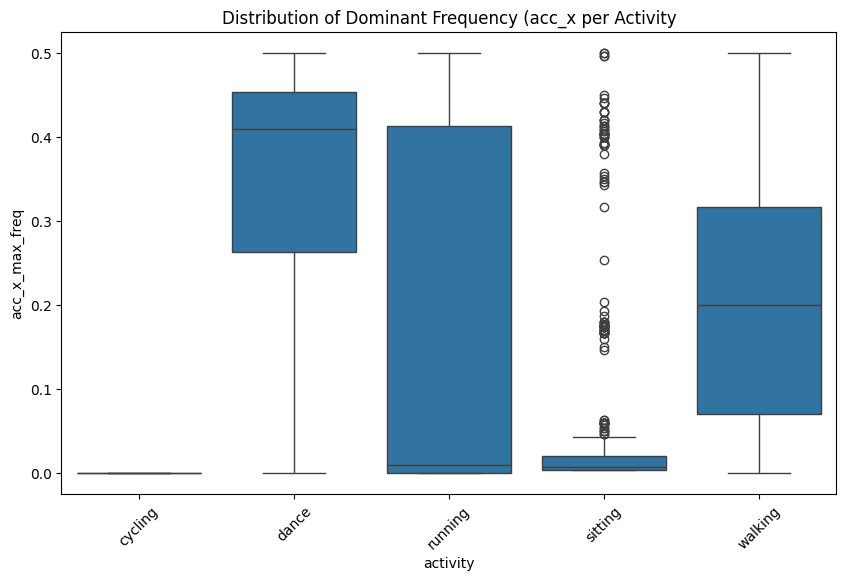

In [54]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='activity', y='acc_x_max_freq', data=df_with_fft)
plt.title('Distribution of Dominant Frequency (acc_x per Activity')
plt.xticks(rotation=45)
plt.show()


acc_x_max_freq and acc_z_max_freq could be useful in determining a difference

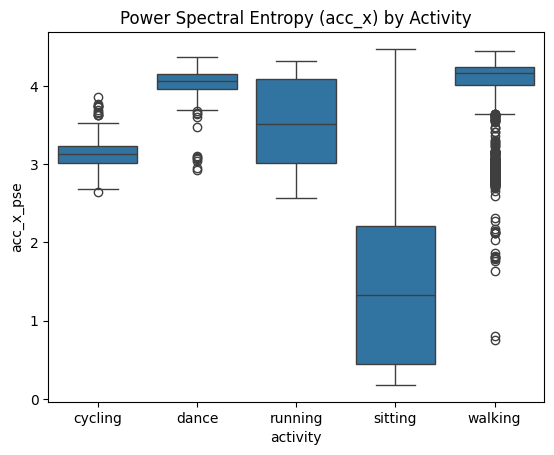

In [66]:
import seaborn as sns

sns.boxplot(x='activity', y='acc_x_pse', data=df_with_fft)
plt.title('Power Spectral Entropy (acc_x) by Activity')
plt.show()

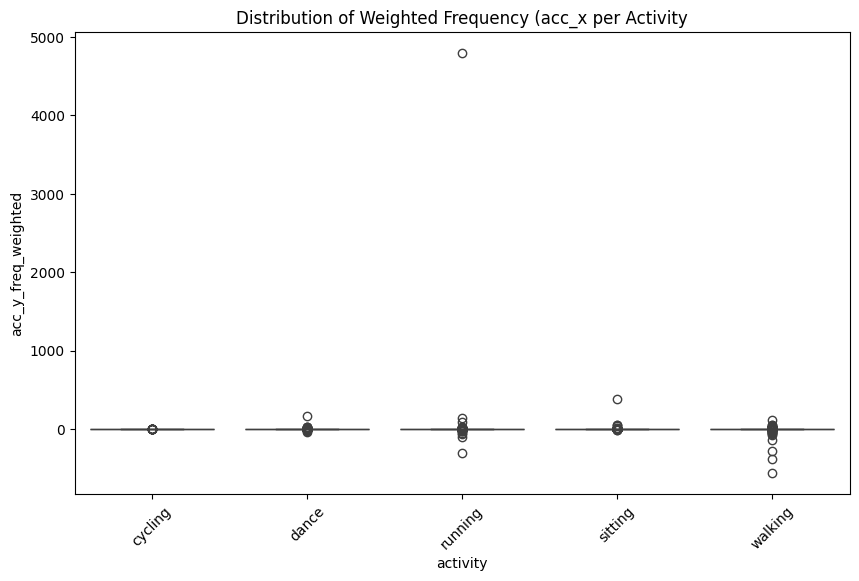

In [68]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='activity', y='acc_y_freq_weighted', data=df_with_fft)
plt.title('Distribution of Weighted Frequency (acc_x per Activity')
plt.xticks(rotation=45)
plt.show()

In [71]:
print(df_with_fft['acc_x_freq_weighted'].var())


1909.5286728337255


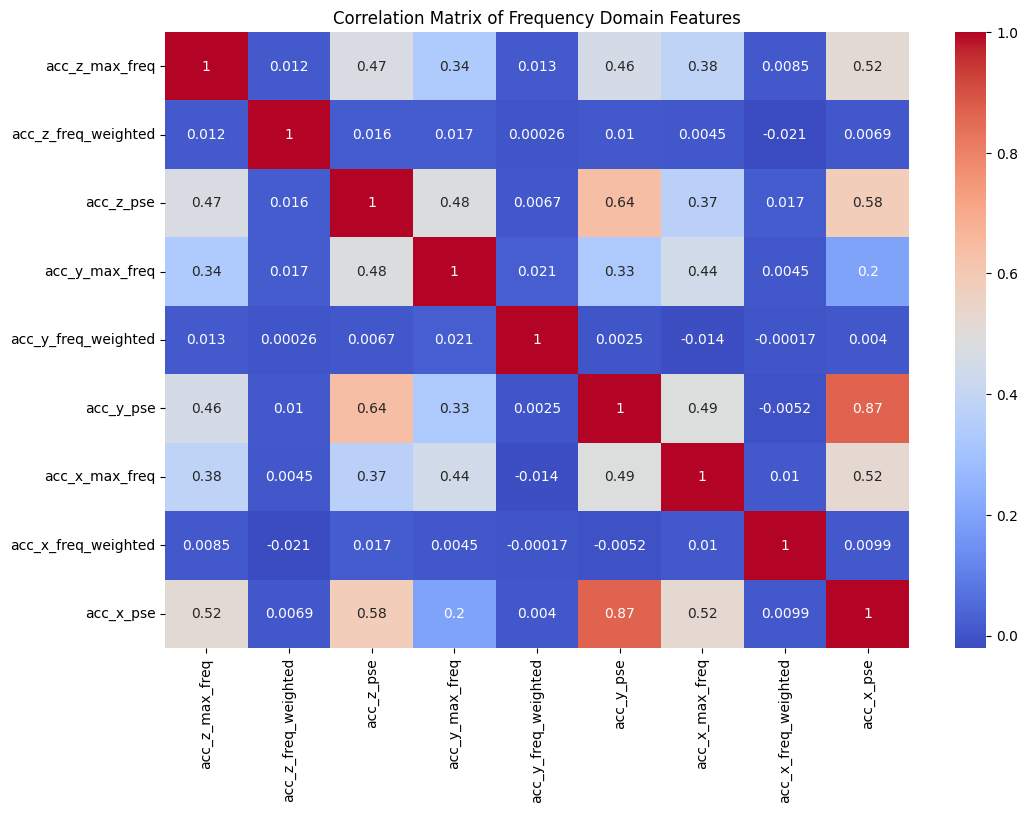

In [75]:
freq_features = [col for col in df_with_fft.columns if 'freq_weighted' in col or 'max_freq' in col or '_pse' in col]

plt.figure(figsize=(12,8))
corr_matrix = df_with_fft[freq_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Frequency Domain Features')
plt.show()

In [76]:
print(corr_matrix)

                     acc_z_max_freq  acc_z_freq_weighted  acc_z_pse  \
acc_z_max_freq             1.000000             0.012067   0.472500   
acc_z_freq_weighted        0.012067             1.000000   0.015811   
acc_z_pse                  0.472500             0.015811   1.000000   
acc_y_max_freq             0.336958             0.016635   0.484167   
acc_y_freq_weighted        0.013176             0.000265   0.006650   
acc_y_pse                  0.457526             0.010088   0.639953   
acc_x_max_freq             0.382119             0.004465   0.368853   
acc_x_freq_weighted        0.008492            -0.020684   0.016515   
acc_x_pse                  0.517535             0.006947   0.582257   

                     acc_y_max_freq  acc_y_freq_weighted  acc_y_pse  \
acc_z_max_freq             0.336958             0.013176   0.457526   
acc_z_freq_weighted        0.016635             0.000265   0.010088   
acc_z_pse                  0.484167             0.006650   0.639953   
acc_y

Max Frequency & Power Spectral Entropy (PSE) — Moderate Positive Correlations

    acc_z_max_freq correlates moderately with acc_z_pse (~0.47), similarly for acc_y and acc_x.

    This suggests that when the dominant frequency (max frequency) changes, the spectral complexity (PSE) also tends to change.

    Intuitively, signals with a clearer dominant frequency tend to have somewhat predictable spectral entropy.

Weighted frequencies aren't informative.


Cross-axis Correlations

    Max frequency and PSE features correlate moderately between axes (e.g., acc_x_max_freq with acc_y_max_freq around 0.44).

    This could indicate that activities affect accelerometer axes somewhat similarly in terms of dominant frequencies and spectral entropy.

In [77]:
columns_to_drop = ['acc_x_freq_weighted', 'acc_y_freq_weighted', 'acc_z_freq_weighted']

In [79]:
df_with_fft = df_with_fft.drop(columns=columns_to_drop)

In [80]:
df_with_fft.tail()

,index,acc_z,acc_y,acc_x,gyro_z,gyro_y,gyro_x,grav_z,grav_y,grav_x,...,pca_9,pca_10,pca_11,pca_12,acc_z_max_freq,acc_z_pse,acc_y_max_freq,acc_y_pse,acc_x_max_freq,acc_x_pse
7506,2025-06-06 17:59:56.812088800,-0.142828,-0.024530,-0.112368,0.018568,-0.035327,-0.052718,-7.883890,-5.819637,0.343042,...,1.312488,-0.508476,-0.149533,-0.462761,0.476667,3.167939,0.176667,4.678454,0.500000,4.188128
7507,2025-06-06 17:59:57.812088800,-0.078357,-0.117142,0.038065,0.023707,-0.004818,-0.033647,-7.950965,-5.734138,0.225927,...,1.570776,-0.615375,-0.050520,-0.569950,0.443333,3.235109,0.056667,4.673977,0.476667,4.255870
7508,2025-06-06 17:59:58.812088800,-0.094664,-0.112366,-0.001020,0.005522,-0.013835,-0.008230,-8.159792,-5.438808,-0.020489,...,1.468364,-0.483468,-0.149539,-0.630220,0.476667,3.069348,0.050000,4.655776,0.186667,4.274772
7509,2025-06-06 17:59:59.812088800,-0.126935,-0.073591,-0.006388,-0.040196,-0.003468,0.078805,-7.941927,-5.743007,-0.007377,...,1.481750,-0.304836,-0.544750,-0.796951,0.213333,2.863511,0.400000,4.665707,0.476667,4.249940
7510,2025-06-06 18:00:00.812088800,-0.127876,-0.087726,0.011362,-0.005015,-0.008947,0.016040,-7.668263,-6.111668,0.111295,...,1.491506,-0.482219,-0.305885,-0.672825,0.476667,2.940879,0.046667,4.673953,0.500000,4.243913


GYRO

In [81]:
import numpy as np
import pandas as pd

class FourierTransformation:

    def find_fft_transformation(self, data, sampling_rate):
        # Compute FFT (real FFT)
        transformation = np.fft.rfft(data, len(data))
        return transformation.real, transformation.imag

    def abstract_frequency(self, data_table, cols, window_size, sampling_rate):
        # Make a copy to avoid modifying original df
        data_table = data_table.copy()
        
        freqs = np.fft.rfftfreq(int(window_size)) * sampling_rate

        # Pre-allocate summary feature columns only
        for col in cols:
            data_table[col + '_max_freq'] = np.nan
            data_table[col + '_freq_weighted'] = np.nan
            data_table[col + '_pse'] = np.nan

        # Rolling over the dataset
        for i in range(window_size, len(data_table)):
            for col in cols:
                window_data = data_table[col].iloc[i - window_size:i].values
                real_ampl, _ = self.find_fft_transformation(window_data, sampling_rate)

                # Dominant frequency
                data_table.loc[i, col + '_max_freq'] = freqs[np.argmax(real_ampl)]

                # Frequency weighted average
                data_table.loc[i, col + '_freq_weighted'] = np.sum(freqs * real_ampl) / np.sum(real_ampl)

                # Power Spectral Entropy (PSE)
                PSD = np.square(real_ampl) / len(real_ampl)
                PSD_pdf = PSD / np.sum(PSD)
                pse = -np.sum(PSD_pdf * np.log(PSD_pdf + 1e-8))  # epsilon to avoid log(0)
                data_table.loc[i, col + '_pse'] = pse

        # Return only the new feature columns
        new_cols = []
        for col in cols:
            new_cols.extend([col + '_max_freq', col + '_freq_weighted', col + '_pse'])
        return data_table[new_cols]



In [83]:
# Example: select acc_* columns
cols_to_use = [col for col in df.columns if col.startswith('gyro_')]

sampling_rate = 1  # your sampling rate in Hz
window_size = 300  # number of samples per window

ft = FourierTransformation()
fft_features = ft.abstract_frequency(df, cols=cols_to_use, window_size=window_size, sampling_rate=sampling_rate)

# Combine original df and FFT features
df_expanded = pd.concat([df_with_fft, fft_features], axis=1)


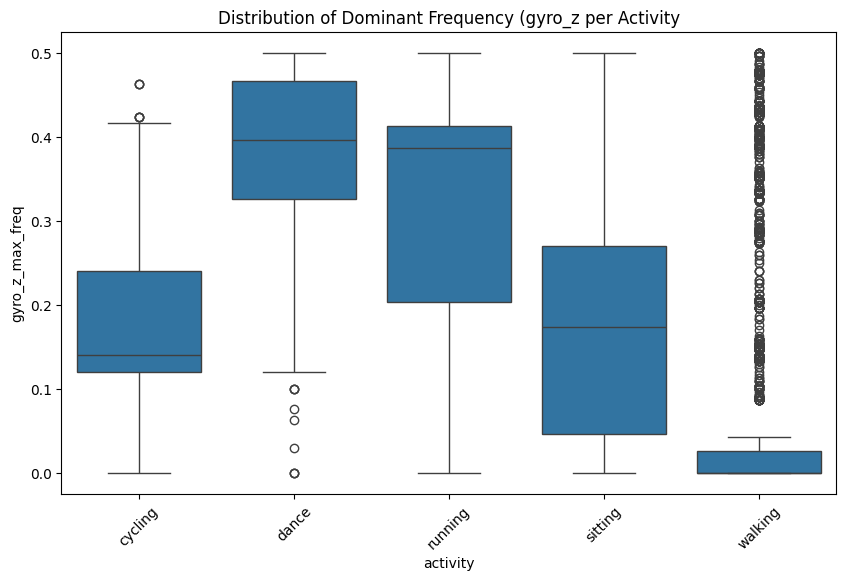

In [88]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='activity', y='gyro_z_max_freq', data=df_expanded)
plt.title('Distribution of Dominant Frequency (gyro_z per Activity')
plt.xticks(rotation=45)
plt.show()

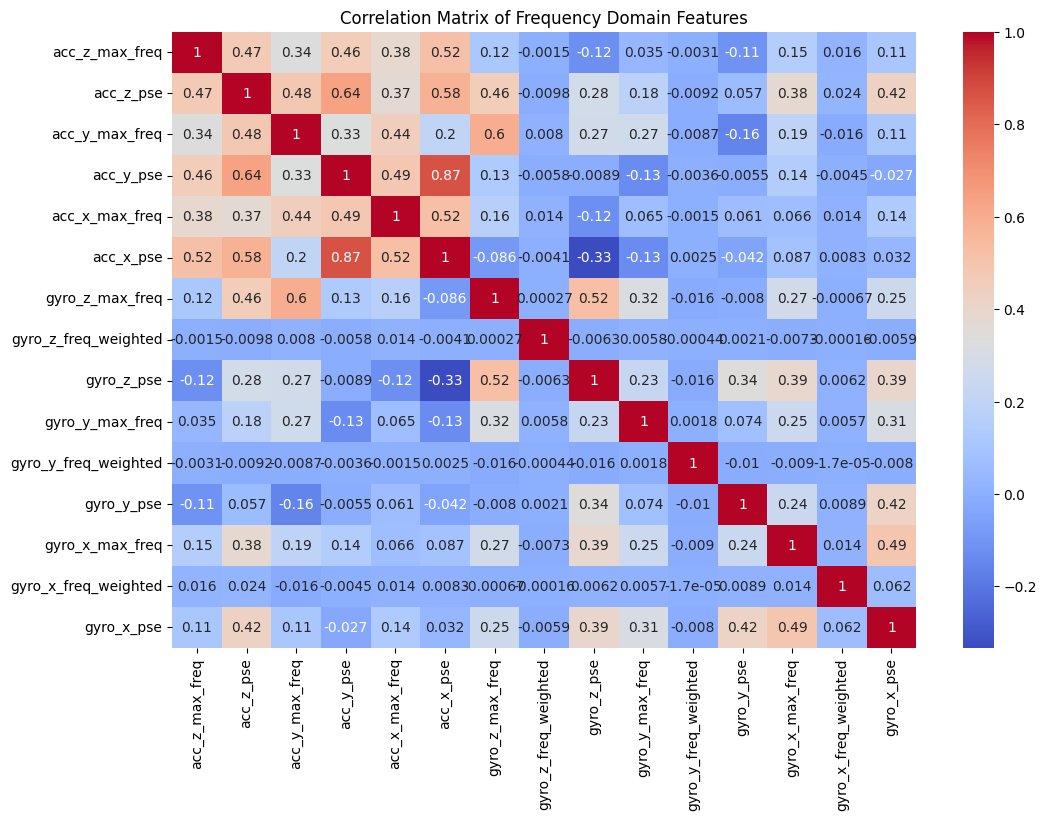

In [90]:
freq_features = [col for col in df_expanded.columns if 'freq_weighted' in col or 'max_freq' in col or '_pse' in col]

plt.figure(figsize=(12,8))
corr_matrix = df_expanded[freq_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Frequency Domain Features')
plt.show()

In [91]:
print(corr_matrix)

                      acc_z_max_freq  acc_z_pse  acc_y_max_freq  acc_y_pse  \
acc_z_max_freq              1.000000   0.472500        0.336958   0.457526   
acc_z_pse                   0.472500   1.000000        0.484167   0.639953   
acc_y_max_freq              0.336958   0.484167        1.000000   0.331554   
acc_y_pse                   0.457526   0.639953        0.331554   1.000000   
acc_x_max_freq              0.382119   0.368853        0.444084   0.488068   
acc_x_pse                   0.517535   0.582257        0.198335   0.865059   
gyro_z_max_freq             0.115476   0.455607        0.597979   0.130692   
gyro_z_freq_weighted       -0.001532  -0.009782        0.008021  -0.005832   
gyro_z_pse                 -0.120695   0.279252        0.271602  -0.008886   
gyro_y_max_freq             0.035353   0.177917        0.266075  -0.134637   
gyro_y_freq_weighted       -0.003061  -0.009201       -0.008679  -0.003570   
gyro_y_pse                 -0.109851   0.056764       -0.157753 

GRAV

In [92]:
# Example: select acc_* columns
cols_to_use = [col for col in df.columns if col.startswith('grav_')]

sampling_rate = 1  # your sampling rate in Hz
window_size = 300  # number of samples per window

ft = FourierTransformation()
fft_features = ft.abstract_frequency(df, cols=cols_to_use, window_size=window_size, sampling_rate=sampling_rate)

# Combine original df and FFT features
df_expanded = pd.concat([df_expanded, fft_features], axis=1)

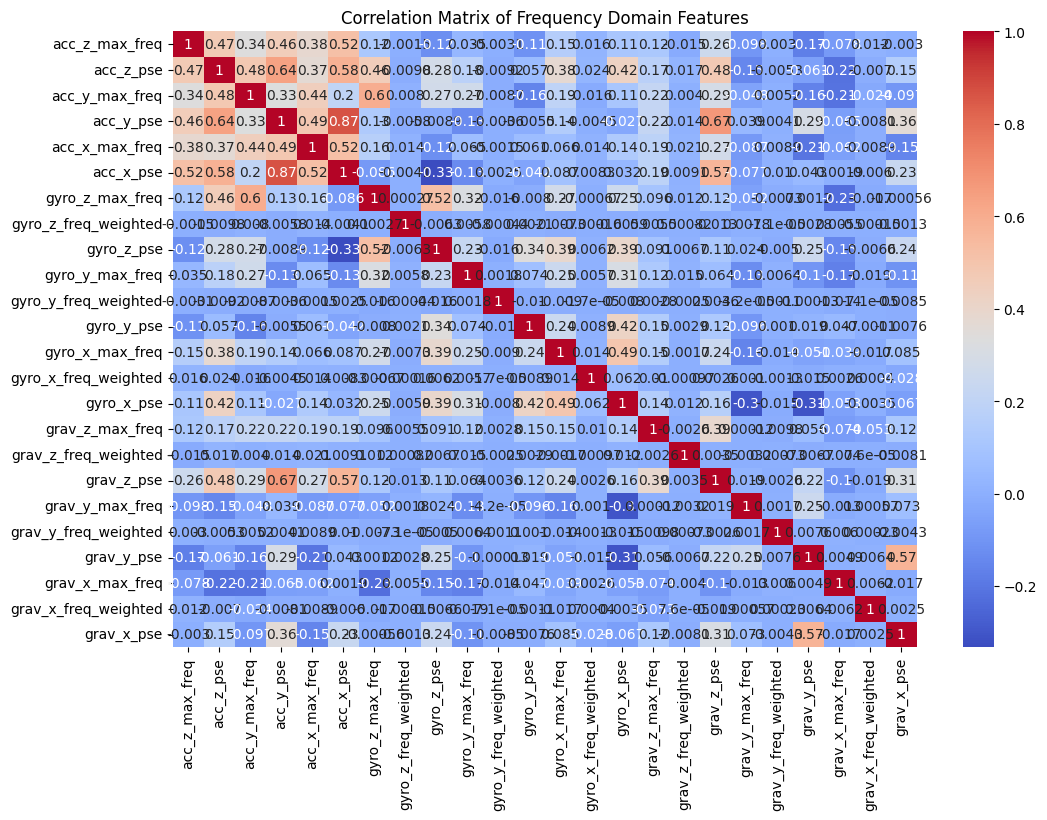

In [93]:
freq_features = [col for col in df_expanded.columns if 'freq_weighted' in col or 'max_freq' in col or '_pse' in col]

plt.figure(figsize=(12,8))
corr_matrix = df_expanded[freq_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Frequency Domain Features')
plt.show()

In [94]:
print(corr_matrix)

                      acc_z_max_freq  acc_z_pse  acc_y_max_freq  acc_y_pse  \
acc_z_max_freq              1.000000   0.472500        0.336958   0.457526   
acc_z_pse                   0.472500   1.000000        0.484167   0.639953   
acc_y_max_freq              0.336958   0.484167        1.000000   0.331554   
acc_y_pse                   0.457526   0.639953        0.331554   1.000000   
acc_x_max_freq              0.382119   0.368853        0.444084   0.488068   
acc_x_pse                   0.517535   0.582257        0.198335   0.865059   
gyro_z_max_freq             0.115476   0.455607        0.597979   0.130692   
gyro_z_freq_weighted       -0.001532  -0.009782        0.008021  -0.005832   
gyro_z_pse                 -0.120695   0.279252        0.271602  -0.008886   
gyro_y_max_freq             0.035353   0.177917        0.266075  -0.134637   
gyro_y_freq_weighted       -0.003061  -0.009201       -0.008679  -0.003570   
gyro_y_pse                 -0.109851   0.056764       -0.157753 

In [99]:
# Drop non-numeric columns automatically
df_features = df.select_dtypes(include=[np.number])


In [100]:
import pandas as pd
import numpy as np

# 1. Calculate correlation matrix (absolute values)
corr_matrix = df_features.corr().abs()

# 2. Set diagonal to NaN to ignore self-correlation
np.fill_diagonal(corr_matrix.values, np.nan)

# 3. Compute average absolute correlation for each feature
mean_corr = corr_matrix.mean(axis=1)

# 4. Rank features: lowest = most independent, highest = most redundant
ranking = mean_corr.sort_values()

# 5. Display top and bottom ranked features
print("Most independent features:\n", ranking.head(10))
print("\nMost redundant features:\n", ranking.tail(10))


Most independent features:
 gyro_y                   0.075210
wrist_rotationRateZ      0.080433
gyro_z                   0.094095
pca_10                   0.098008
wrist_rotationRateY      0.102328
pca_12                   0.103190
heart_bpm_interpolate    0.103458
wrist_rotationRateX      0.103541
gyro_x                   0.106255
acc_y                    0.106374
dtype: float64

Most redundant features:
 wrist_quaternionZ    0.131811
grav_x               0.132730
acc_z                0.137136
wrist_quaternionX    0.138866
grav_z               0.140791
pca_3                0.150778
pca_4                0.151081
wrist_quaternionW    0.151258
pca_1                0.170274
pca_2                0.173187
dtype: float64


In [101]:
df_expanded.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'activity', 'heart_bpm_interpolate', 'pca_1', 'pca_2', 'pca_3', 'pca_4',
       'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11',
       'pca_12', 'acc_z_max_freq', 'acc_z_pse', 'acc_y_max_freq', 'acc_y_pse',
       'acc_x_max_freq', 'acc_x_pse', 'gyro_z_max_freq',
       'gyro_z_freq_weighted', 'gyro_z_pse', 'gyro_y_max_freq',
       'gyro_y_freq_weighted', 'gyro_y_pse', 'gyro_x_max_freq',
       'gyro_x_freq_weighted', 'gyro_x_pse', 'grav_z_max_freq',
       'grav_z_freq_weighted', 'grav_z_pse', 'grav_y_max_freq',
       'grav_y_freq_weighted', 'grav_y_pse

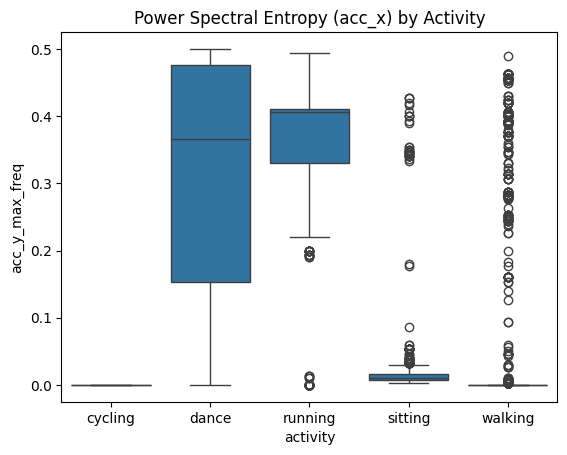

In [153]:
import seaborn as sns

sns.boxplot(x='activity', y='acc_y_max_freq', data=df_expanded)
plt.title('Power Spectral Entropy (acc_x) by Activity')
plt.show()

In [ ]:
columns_to_drop = ['grav_x_pse', 'grav_y_pse']

In [112]:
df_expanded = df_expanded.drop(columns=columns_to_drop)

In [113]:
df_expanded.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'activity', 'heart_bpm_interpolate', 'pca_1', 'pca_2', 'pca_3', 'pca_4',
       'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11',
       'pca_12', 'acc_z_max_freq', 'acc_z_pse', 'acc_y_max_freq', 'acc_y_pse',
       'acc_x_max_freq', 'acc_x_pse', 'gyro_z_max_freq',
       'gyro_z_freq_weighted', 'gyro_z_pse', 'gyro_y_max_freq',
       'gyro_y_freq_weighted', 'gyro_y_pse', 'gyro_x_max_freq',
       'gyro_x_freq_weighted', 'gyro_x_pse', 'grav_z_max_freq',
       'grav_z_freq_weighted', 'grav_z_pse', 'grav_y_max_freq',
       'grav_y_freq_weighted', 'grav_x_max

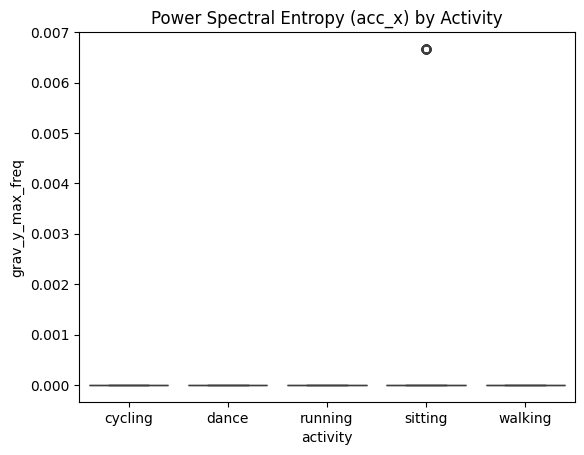

In [145]:
sns.boxplot(x='activity', y='grav_y_max_freq', data=df_expanded)
plt.title('Power Spectral Entropy (acc_x) by Activity')
plt.show()

In [146]:
columns_to_drop = ['gyro_x_pse', 'gyro_z_pse', 'gyro_z_freq_weighted', 'gyro_y_freq_weighted', 'gyro_x_freq_weighted', 'gyro_x_max_freq', 'gyro_y_max_freq', 'grav_x_freq_weighted', 'grav_y_freq_weighted','grav_z_freq_weighted', 'grav_y_max_freq', 'gyro_z_max_freq', 'grav_z_max_freq', 'grav_y_max_freq', 'grav_x_max_freq']

In [149]:
df_expanded = df_expanded.drop(columns=columns_to_drop)

In [138]:
df_expanded.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'activity', 'heart_bpm_interpolate', 'pca_1', 'pca_2', 'pca_3', 'pca_4',
       'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11',
       'pca_12', 'acc_z_max_freq', 'acc_z_pse', 'acc_y_max_freq', 'acc_y_pse',
       'acc_x_max_freq', 'acc_x_pse', 'gyro_z_max_freq', 'gyro_y_pse',
       'grav_z_max_freq', 'grav_z_pse', 'grav_y_max_freq', 'grav_x_max_freq'],
      dtype='object')

In [139]:
df_expanded.isnull().sum()

index                      0
acc_z                      0
acc_y                      0
acc_x                      0
gyro_z                     0
gyro_y                     0
gyro_x                     0
grav_z                     0
grav_y                     0
grav_x                     0
wrist_rotationRateX        0
wrist_rotationRateY        0
wrist_rotationRateZ        0
wrist_gravityX             0
wrist_gravityY             0
wrist_gravityZ             0
wrist_accelerationX        0
wrist_accelerationY        0
wrist_accelerationZ        0
wrist_quaternionW          0
wrist_quaternionX          0
wrist_quaternionY          0
wrist_quaternionZ          0
activity                   0
heart_bpm_interpolate      0
pca_1                      0
pca_2                      0
pca_3                      0
pca_4                      0
pca_5                      0
pca_6                      0
pca_7                      0
pca_8                      0
pca_9                      0
pca_10        

In [151]:
df_final = df_expanded.dropna()


/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_69563/1885773566.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/goran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


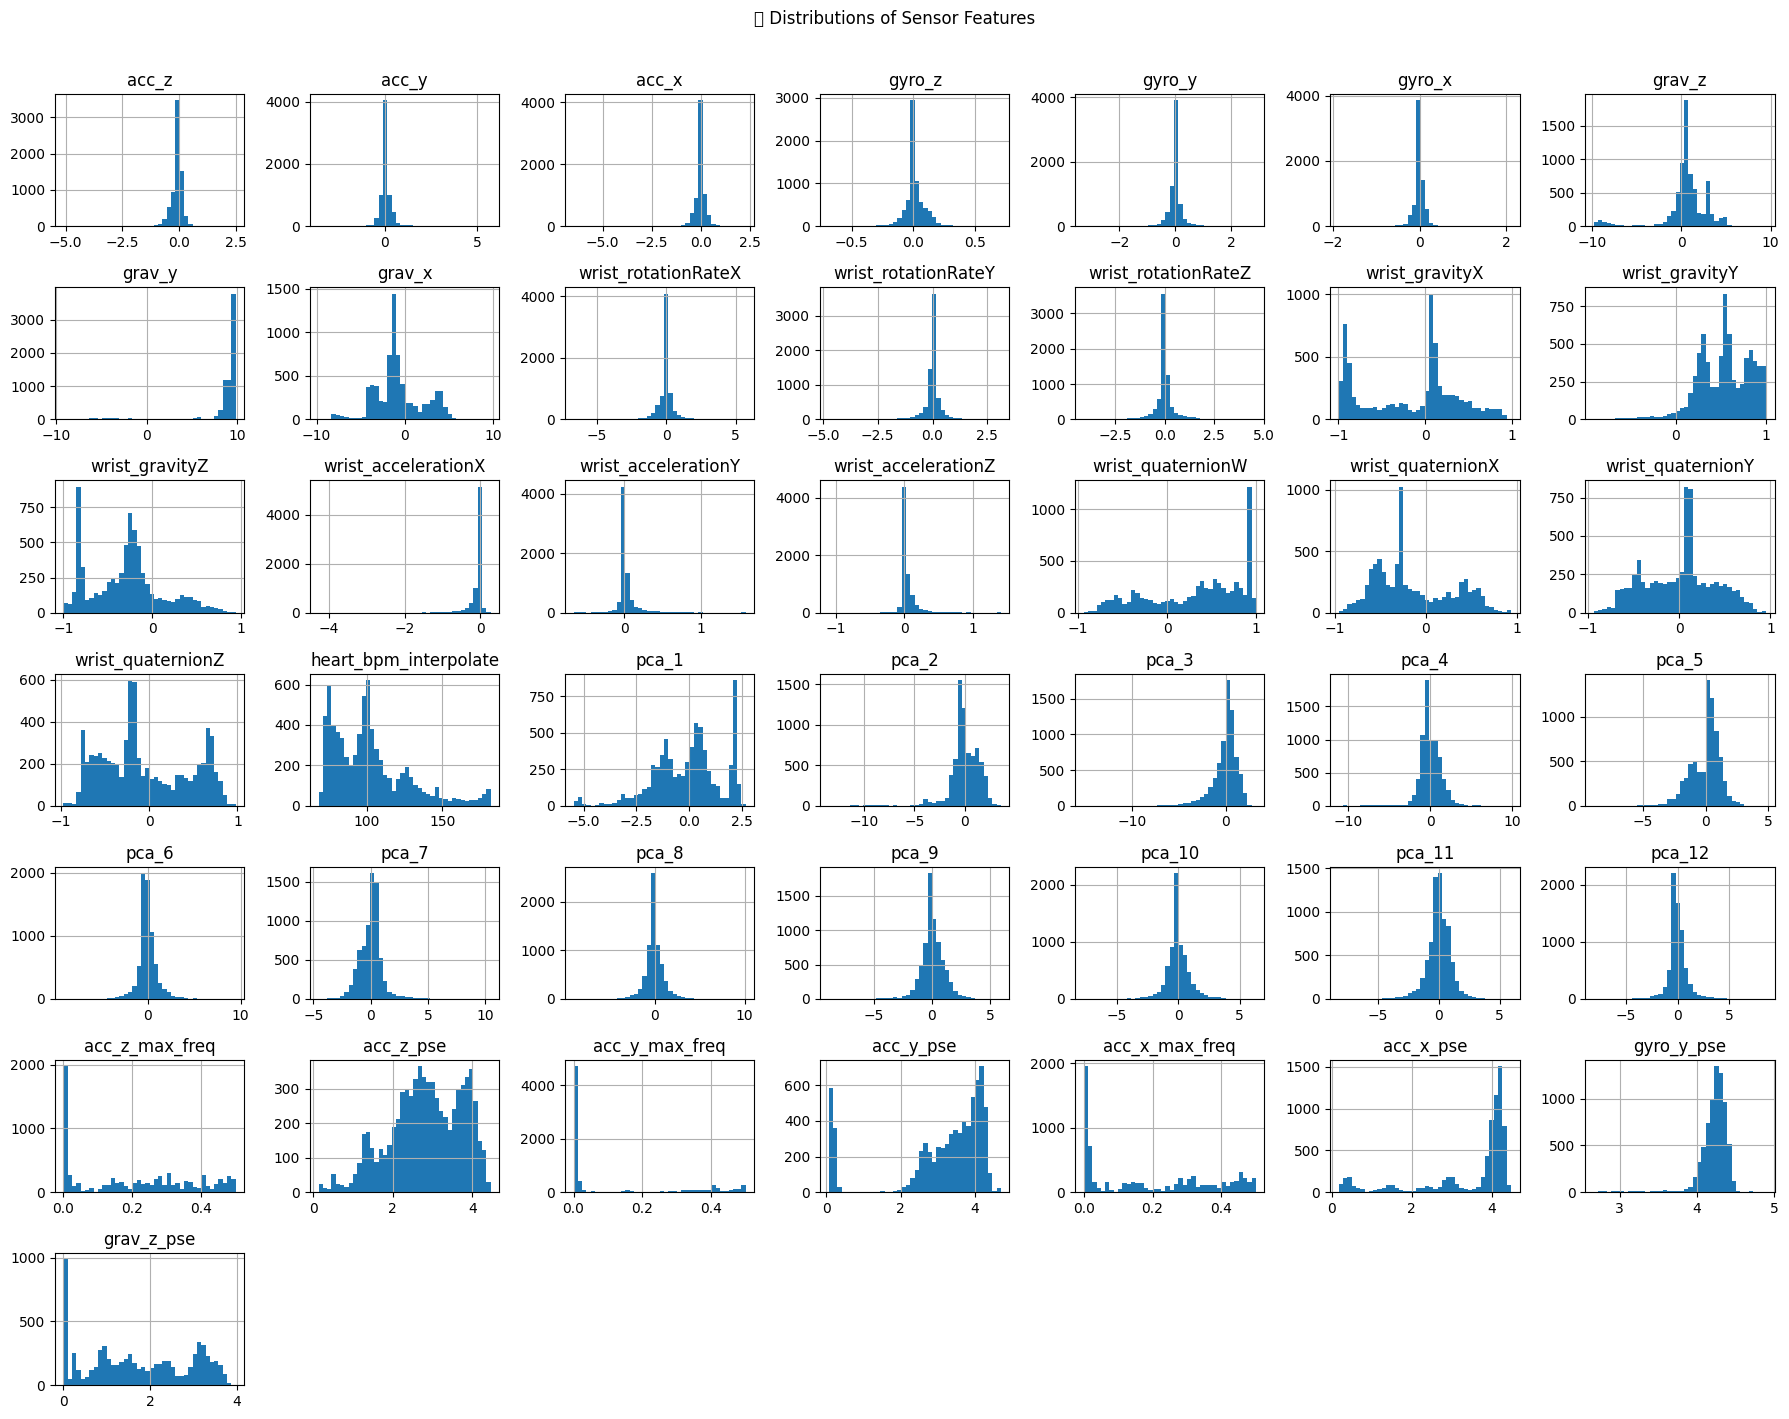

In [152]:
# Distribution of features
df_final.hist(figsize=(18, 14), bins=40)
plt.suptitle('📊 Distributions of Sensor Features', y=1.01)
plt.tight_layout()
plt.show()

In [159]:
# Example: select acc_* columns
cols_to_use = [col for col in df.columns if col.startswith('wrist_')]

sampling_rate = 1  # your sampling rate in Hz
window_size = 300  # number of samples per window

ft = FourierTransformation()
fft_features = ft.abstract_frequency(df, cols=cols_to_use, window_size=window_size, sampling_rate=sampling_rate)

# Combine original df and FFT features
df_expanded = pd.concat([df_expanded, fft_features], axis=1)

In [161]:
df_expanded.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x',
       ...
       'wrist_quaternionW_pse', 'wrist_quaternionX_max_freq',
       'wrist_quaternionX_freq_weighted', 'wrist_quaternionX_pse',
       'wrist_quaternionY_max_freq', 'wrist_quaternionY_freq_weighted',
       'wrist_quaternionY_pse', 'wrist_quaternionZ_max_freq',
       'wrist_quaternionZ_freq_weighted', 'wrist_quaternionZ_pse'],
      dtype='object', length=121)

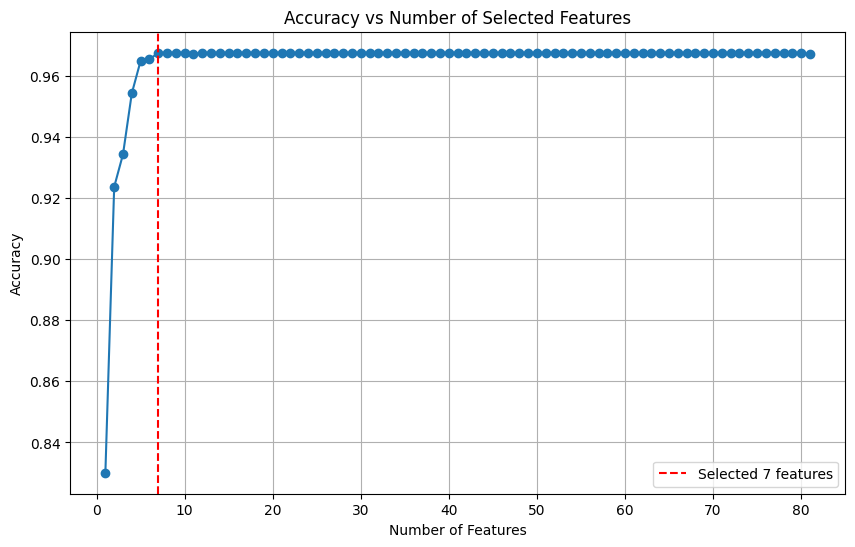

Best accuracy of 0.9676 with 7 features

Final model evaluation:
Accuracy: 0.9676131322094055

Classification Report:
               precision    recall  f1-score   support

     cycling       0.99      1.00      1.00       131
       dance       0.91      0.96      0.93       451
     running       0.93      0.74      0.82       161
     sitting       0.99      1.00      0.99       405
     walking       0.99      0.99      0.99      1106

    accuracy                           0.97      2254
   macro avg       0.96      0.94      0.95      2254
weighted avg       0.97      0.97      0.97      2254

Confusion Matrix:
 [[ 131    0    0    0    0]
 [   1  434    6    0   10]
 [   0   38  119    0    4]
 [   0    0    1  404    0]
 [   0    7    2    4 1093]]

Feature importances:
heart_bpm_interpolate: 0.3808
wrist_quaternionW_pse: 0.3204
wrist_gravityX_pse: 0.1189
wrist_gravityY_pse: 0.0862
acc_z_pse: 0.0602
grav_x: 0.0250
acc_y_max_freq: 0.0084


In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare data
X = df_expanded.drop(columns=['activity', 'index'])
y = df_expanded['activity']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train initial decision tree on all features to get importances
tree = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)
tree.fit(X_train, y_train)

importances = tree.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# 4. Forward feature selection: test top 1 to 100 features
accuracies = []
for i in range(1, min(101, len(sorted_features))):  # limit to max features you have
    top_features = sorted_features[:i]
    tree.fit(X_train[top_features], y_train)
    y_pred = tree.predict(X_test[top_features])
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Plot accuracy vs number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
best_num_features = np.argmax(accuracies) + 1
plt.axvline(x=best_num_features, color='r', linestyle='--', label=f'Selected {best_num_features} features')
plt.title('Accuracy vs Number of Selected Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

print(f"Best accuracy of {max(accuracies):.4f} with {best_num_features} features")

# 6. Train final model with best features
best_features = sorted_features[:best_num_features]
final_tree = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)
final_tree.fit(X_train[best_features], y_train)

# 7. Evaluate final model
y_pred_final = final_tree.predict(X_test[best_features])

print("\nFinal model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

# 8. Print feature importances of final model
print("\nFeature importances:")
for f, imp in zip(best_features, final_tree.feature_importances_):
    print(f"{f}: {imp:.4f}")


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Prepare your data
X = df_expanded.drop(columns=['activity', 'index'])
y = df_expanded['activity']

# Train a decision tree to get feature importances
tree = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)
tree.fit(X, y)

# Sort features by importance
importances = tree.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]

# Select top N features (e.g., 7 as you found best before)
top_n = 7
top_features = sorted_features[:top_n]

# Use StratifiedKFold to preserve label distribution in folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
fold = 1

for train_index, test_index in skf.split(X[top_features], y):
    X_train, X_test = X.iloc[train_index][top_features], X.iloc[test_index][top_features]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    fold += 1

print(f"\nAverage CV Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


Fold 1 Accuracy: 0.9568
Fold 2 Accuracy: 0.9660
Fold 3 Accuracy: 0.9774
Fold 4 Accuracy: 0.9827
Fold 5 Accuracy: 0.9614

Average CV Accuracy: 0.9688 ± 0.0097


In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Prepare data
X = df_expanded.drop(columns=['activity', 'index'])
y = df_expanded['activity']

# Use the previously computed feature importances and sorted_features
# Just take the top 9 features
top_n = 9
final_features = sorted_features[:top_n]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X[final_features], y, test_size=0.3, random_state=42, stratify=y
)

# Train model
final_model = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)
final_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_model.predict(X_test)
print(f"Accuracy on test set with top {top_n} features: {final_model.score(X_test, y_test):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importances
print("\nFeature Importances:")
for feat, imp in zip(final_features, final_model.feature_importances_):
    print(f"{feat}: {imp:.4f}")


Accuracy on test set with top 9 features: 0.9672

Classification Report:
              precision    recall  f1-score   support

     cycling       1.00      0.93      0.97       119
       dance       0.92      0.95      0.93       431
     running       0.96      0.90      0.93       167
     sitting       0.98      1.00      0.99       428
     walking       0.98      0.98      0.98      1109

    accuracy                           0.97      2254
   macro avg       0.97      0.95      0.96      2254
weighted avg       0.97      0.97      0.97      2254

Confusion Matrix:
[[ 111    4    1    0    3]
 [   0  409    3    2   17]
 [   0   14  150    0    3]
 [   0    0    0  426    2]
 [   0   17    2    6 1084]]

Feature Importances:
heart_bpm_interpolate: 0.3837
wrist_quaternionW_pse: 0.3168
wrist_gravityX_pse: 0.1074
acc_z_pse: 0.0885
wrist_quaternionY_pse: 0.0010
wrist_gravityZ_pse: 0.0132
wrist_gravityY_pse: 0.0611
grav_y: 0.0283
acc_y_max_freq: 0.0000


In [196]:
top_n_features = [
    'heart_bpm_interpolate',
    'wrist_quaternionW_pse',
    'wrist_gravityX_pse',
    'acc_z_pse',
    'wrist_quaternionY_pse',
    'wrist_gravityZ_pse',
    'wrist_gravityY_pse',
    'grav_y'
]


In [207]:
final_dataset = df_expanded[['index'] + top_n_features + ['activity']]

In [208]:
final_dataset.columns

Index(['index', 'heart_bpm_interpolate', 'wrist_quaternionW_pse',
       'wrist_gravityX_pse', 'acc_z_pse', 'wrist_quaternionY_pse',
       'wrist_gravityZ_pse', 'wrist_gravityY_pse', 'grav_y', 'activity'],
      dtype='object')

/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_69563/1609802928.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/goran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


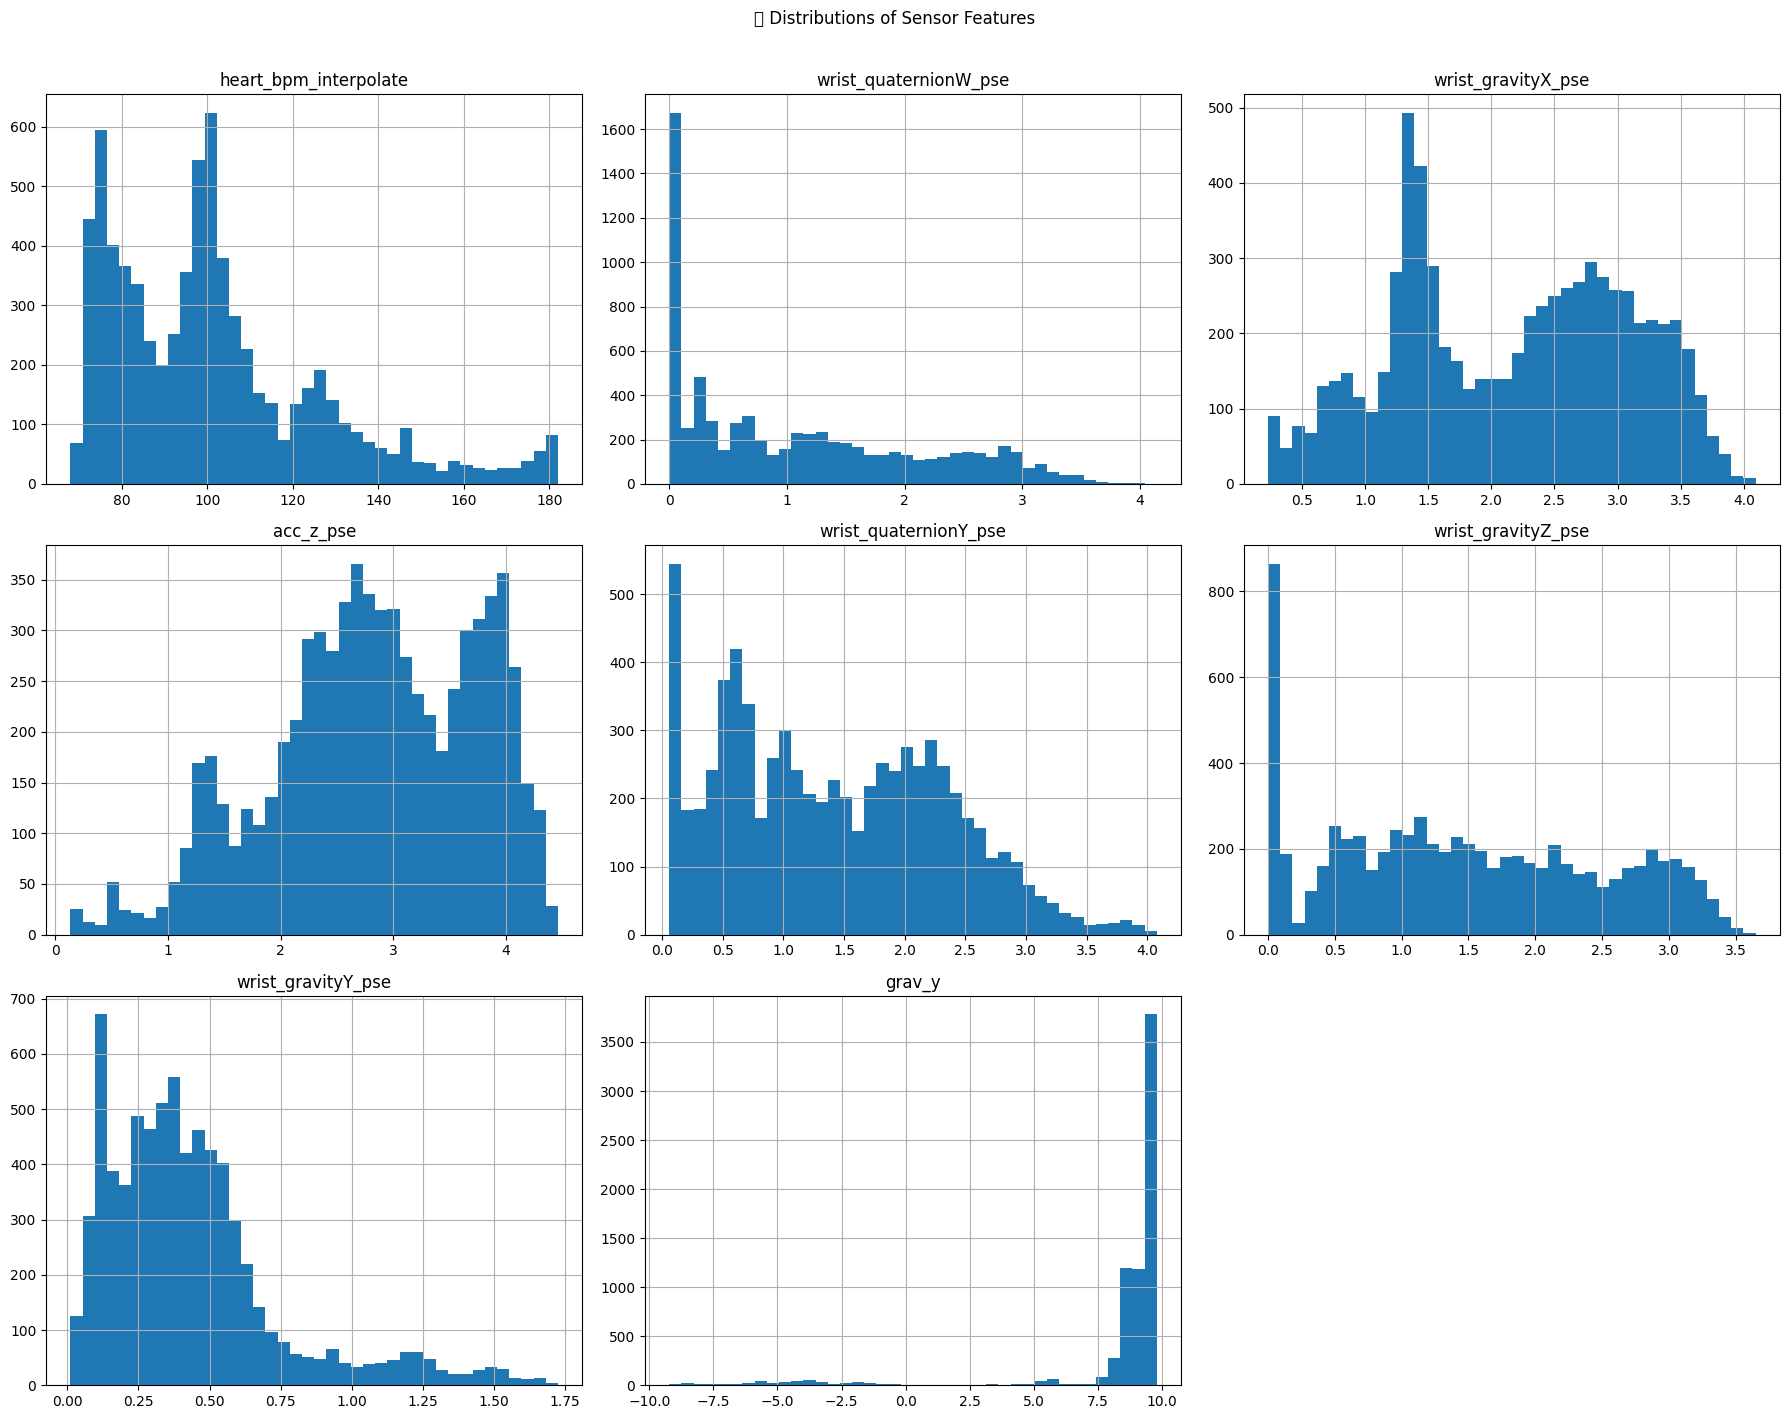

In [204]:
# Distribution of features
final_dataset.hist(figsize=(18, 14), bins=40)
plt.suptitle('📊 Distributions of Sensor Features', y=1.01)
plt.tight_layout()
plt.show()

In [210]:
final_dataset = final_dataset.dropna()

In [211]:
final_dataset.to_csv('final_dataset.csv', index=False)